<a href="https://colab.research.google.com/github/AarizZafar/Optical_character_recognition/blob/main/CNN_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2 as cv
from random import shuffle
from tqdm import tqdm  # to show progress bar
import tensorflow as tf
# from tensorflow import keras
import matplotlib.pyplot as plt
import time

### code used to take screen shot of each numeric input and store in user's local host system


image_path = "D:/codes/soft_computing/numbers/test_data/"    -> user's local host storage path

    for i in range(10):

        print("going to take screenshot in 3 sec")

        time.sleep(7)

        image = pyg.screenshot(region=(48,300,770,450))

        image.save(image_path+str(i)+".png")

        print("screen shot taken and save ", str(i),".png")

GIVING ACCES OF USER DRIVE TO THIS COLAB NOTEBOOK

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_label(image_folder_name):
    if image_folder_name == '0':
        return 0
    elif image_folder_name == '1':
        return 1
    elif image_folder_name == '2':
        return 2
    elif image_folder_name == '3':
        return 3
    elif image_folder_name == '4':
        return 4
    elif image_folder_name == '5':
        return 5
    elif image_folder_name == '6':
        return 6
    elif image_folder_name == '7':
        return 7
    elif image_folder_name == '8':
        return 8
    elif image_folder_name == '9':
        return 9

CREATING THE DATA SET FROM USED MADE DATA

In [ ]:
folder_path = "/content/drive/MyDrive/ALL_IN_ONE/soft_computing/project /data/numbers"

def create_data():
    data = []
    for folder in tqdm(os.listdir(folder_path)):
        print(folder)
        for image in os.listdir(folder_path + '/' + folder):
            # print(image)
            image_path = os.path.join(folder_path,folder,image)
            image_data = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
            try:
              image_data = cv.resize(image_data,(28,28))
            except cv.error as error:
              continue
            data.append([np.array(image_data),create_label(folder)])
    shuffle(data)
    return data

TRAINING DATA SET IS BASED ON HAND WRITTEN DIGIT CREATED BY THE ***USED HIMSELF***

In [4]:
data = create_data()

DIVIDING THE DATA INTO TRAINING AND TEST DATA SET

In [ ]:
train_data, test_data = data[:899],data[899:]

print("train_data shape : " , len(train_data))
print("\ntest_data : ", len(test_data), "\n-------------------------")

#----------------- < TRAIN DATA SPLIT > -----------------------------
x_train = np.array([data[0] for data in train_data])
x_train = x_train.reshape(len(x_train),28,28,1)
y_train = [data[1] for data in train_data]
y_train = np.array(y_train)

#----------------- < TEST DATA SPLIT > ------------------------------
x_test = np.array([data[0] for data in test_data])
x_test = x_test.reshape(len(x_test),28,28,1)
y_test = [data[1] for data in test_data]
y_test = np.array(y_test)

#-------------------------------------------------------

print("x_train shape : ", np.shape(x_train),
      "\ny_train shape : " , np.shape(y_train),
      "\nx_test shape : ", np.shape(x_test),
      "\ny_test shape : ", np.shape(y_test))

train_data shape :  899

test_data :  100 
-------------------------
x_train shape :  (899, 28, 28, 1) 
y_train shape :  (899,) 
x_test shape :  (100, 28, 28, 1) 
y_test shape :  (100,)


## -------------------------------------------------------- < BUILDING THE MODEL > ------------------------------------------------------------



 ***`reason to use relu ->`***

1) efficient to compute [max(0,value)]

2) increase generalization performance models are less likely to overfit the training data and generalize will on new data.

#### ***Output Layer ->***

> The output layer will have 10 neurons that represent each digit 0,1,2,3,4,5,6,7,8,9


> The activation function used will be softmax


***`reason to use softmax ->`***

1) commonly used in output layer of neural network

2) takes input of real number and gives an output of probability.

3) Each probability of a neuron represents that the input belongs to a certain class.

4) The sum of probabily of each neuron will sum up to 1.

In [ ]:
model = tf.keras.Sequential()

# This is the input layer
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# 2nd convo layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# 3rd convo layer
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# fulley connected layer 1
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))

# fulley connected layer 2
model.add(tf.keras.layers.Dense(128,activation='relu'))

# final output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

GIVING THE MODEL SUMMARY

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 32)         

<u> COMPILING THE MODEL ->




loss function = sparse categorical crossentropy

***`Reason to use -> `***

1) Good choice to use where we have multiple number of classes where the labels are integers.
2) we are classifying our inputs, which means our input belongs to one numeric class. The labels for image classification problems are typically integers representing the class of text.

metric = 'accuracy'

***`Reason to use ->`***

1) The model can predict some right and some wrong

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

FITTING (TRAINING) THE MODEL WITH TRAIN AND TEST DATA ->

In [ ]:
model.fit(x_train,y_train,batch_size=10,epochs=7)
print(np.shape(x_train),np.shape(y_train))

Epoch 1/7
90/90 [==============================] - 3s 16ms/step - loss: 1.5308 - accuracy: 0.6307
Epoch 2/7
90/90 [==============================] - 1s 16ms/step - loss: 0.2198 - accuracy: 0.9388
Epoch 3/7
90/90 [==============================] - 1s 16ms/step - loss: 0.1816 - accuracy: 0.9444
Epoch 4/7
90/90 [==============================] - 1s 16ms/step - loss: 0.0829 - accuracy: 0.9778
Epoch 5/7
90/90 [==============================] - 1s 16ms/step - loss: 0.0502 - accuracy: 0.9844
Epoch 6/7
90/90 [==============================] - 2s 21ms/step - loss: 0.0769 - accuracy: 0.9778
Epoch 7/7
90/90 [==============================] - 2s 25ms/step - loss: 0.0552 - accuracy: 0.9822
(899, 28, 28, 1) (899,)


CREATING A SEPERATE DATA SET CREATED BY THE USED TO GIVE THE MODEL A


### ***COMPLETE NEW TEST DATA.***

In [ ]:
def hand_written_test_data():
    data = []
    # user drive path provided
    for image in tqdm(os.listdir("/content/drive/MyDrive/soft_computing/project /data/test_data")):
        image_path = os.path.join("/content/drive/MyDrive/soft_computing/project /data/test_data",image)

        image_data = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        image_number = image.split('.')[0]
        try:
            image_data = cv.resize(image_data,(28,28))
        except cv.error as error:
            continue
        data.append([np.array(image_data),image_number])
    shuffle(data)
    return data

CREATING THE DATA SET ->

In [ ]:
hand_written_test_data = hand_written_test_data()

100%|██████████| 10/10 [00:00<00:00, 100.16it/s]


VISUALIZING THE OUTPUT WITH THE NEW DATA SET PROVIDED BY THE USER ->

1/1 [==============================] - 0s 21ms/step


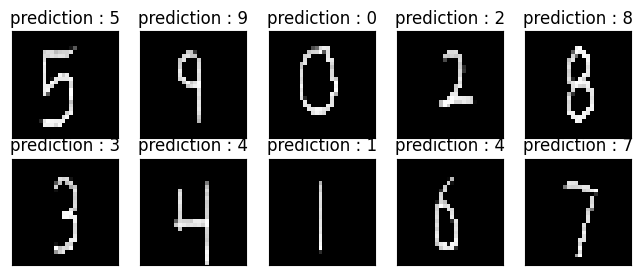

In [ ]:
#------------- < CREATING GRID TO SHOW ALL OUTPUTS > --------------------------------------------------
output_grid = plt.figure(figsize=(8,8))

for image_number, image_data in enumerate(hand_written_test_data):
    image_data = image_data[0]
    image_data_copy = image_data

#------------- < RESHAPING IMAGE DATA TO PASS IT INTO MODEL AND PERFORMING PREDICTIONS > ---------------
    image_data = np.reshape(image_data,(1,28,28,1))   # ( BATCH_SIZE, HEIGHT, WIDTH, CHANNEL ) ACCEPTED MODEL INPUT
    prediction = model.predict([image_data])

#------------- < ADDING THE RESULT TO THE SUB PLOT (OUTPUT GRID) > --------------------------------------
    output_image = output_grid.add_subplot(5,5,image_number+1)

    str_output = "prediction : " + str(np.argmax(prediction))
    output_image.imshow(image_data_copy,cmap='gray')
    plt.title(str_output)

# ------------- < REMOVING THE X,Y AXIS LABELS > -------------------------------------------------------
    output_image.axes.get_xaxis().set_visible(False)
    output_image.axes.get_yaxis().set_visible(False)

plt.show()